In [75]:
%pylab inline

mpl.style.use('seaborn')
rc('figure', figsize=(3,3/1.61))

from scipy.optimize import fsolve

Populating the interactive namespace from numpy and matplotlib


In [76]:
from metpy.constants import earth_avg_angular_vel
from metpy.units import units

Q_ = units.Quantity

The coriolis force is given by $f = 2 \Omega \sin(\theta)$, where $\theta$ is the latitude. This quantity has units time, so plotting the time scale associated with rotation is helpful. The latitude where the rotational time scale satisfies $f = \epsilon / T_E$ is $\theta = \SI{1.31}{\deg N}$.

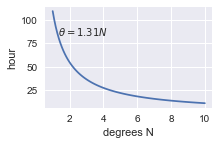

In [78]:
lat = r_[1:10:101j]
def cori(lat):
    return (2 *earth_avg_angular_vel * sin(lat*2*pi/360)).to("1/hr")


order_eps_lat = fsolve(lambda x: cori(x).magnitude -  1/8.3/10,1)

plot(lat, 1/cori(lat))
annotate(fr'$\theta = {order_eps_lat[0]:.2f} N$', 
         xy=(order_eps_lat, 1/cori(order_eps_lat).magnitude))
         
xlabel(r"degrees N")
ylabel(r"hour")